#Introduction to Neural Network


##Creating a Neural Network

In [2]:
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

###Dataset

We will use the MNIST Fashion Dataset. It is included in Keras.

This dataset contains 60,000 images for training and 10,000 images for validation/testing.

In [3]:
fashion_mnist = keras.datasets.fashion_mnist # loading the dataset present in keras

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split the dataset into tetsing and training

4423680/4422102 [==============================] - 0s 0us/step


Understanding the dataset: it contains 60,000 images of 28x28 pixels each(784 in total).

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
# A Quick look at a single pixel of an image
train_images[0,23,19] 

210

Gray Scale image with each pixel value in the range of 0(black) and 255(white). No color channels.

In [7]:
train_labels[:10] # Looking at the first 10 training labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Labels are integers ranging from 0 - 9. Each integer represents a specific article of clothing. Let's create an array of label names to indicate which is which.

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Let's take a look at what some of these images look like!

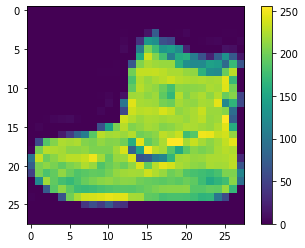

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

##Data Preprocessing
The last step before creating the model is to *preprocess* the data. This simply means applying some prior transformations to the data before feeding it the model. In this case we will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. We can do this by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values. 

In [14]:
#Normalising the data to values between 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

#Building the model
Build the model using keras sequential model with 3 different layers. This model essentially represents a feed-forward neural network(one that passes values from left to right). The following is the architecture

In [17]:
model = keras.Sequential([
       keras.layers.Flatten(input_shape=(28, 28)), # input layer (1)  
       keras.layers.Dense(128, activation='relu'), # hidden layer(2)
       keras.layers.Dense(10, activation='softmax') # output layer(3)               
])

**Layer 1:** Input layer consists of 784 neurons. The flatten layer means that it  will reshape the shape (28,28) array into a vector of 784 neurons such that each pixel will be associated with one neuron.

**Layer 2:** Hidden layer. The *dense* denotes that this layer will be fully connected and each neuron from the previous layer connects to each neuron of this layer. It has 128 neurons and uses the rectified linear unit activation function.

**Layer 3:** This is the output layer which is also a dense layer. It has 10 neurons that we will look at to determine our models output. Each neuron represnts the probability of a given image being one of the 10 different classes. The activation function *softmax* is used on this layer to calculate a probability distribution for each class. This means the value of any neuron in this layer will be between 0 and 1, where 1 represents a high probability of the image being that class.

##Compile the Model
The last step before building the model is to define the loss function, optimizer and metrics.

In [18]:
model.compile(optimizer= 'adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

##Training the Model


In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6238 - accuracy: 0.7845
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3842 - accuracy: 0.8621
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3412 - accuracy: 0.8761
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3152 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2978 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2825 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2634 - accuracy: 0.9020
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2576 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2474 - accuracy: 0.9090
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.233

#Evaluating the Model
Here, verbose = 0 (silent) or 1 (progress bar) 

In [22]:
# Evaluating the model by inputting test/validation data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=1)
print('Test Accuracy is: ', test_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8883
Test Accuracy is:  0.8883000016212463


You'll likely notice that the accuracy here is lower than when training the model. This difference is reffered to as **overfitting**.

#Making Predictions

In [24]:
#To make predictions pass an array of input data, the .predict() returns an array of predictions for each image passed.
predictions = model.predict(train_images) 

In [25]:
 # predictions for a single image
 # displays the probability distribution of the likelihood of the input data being a particular class
 # 10 classes are present for this dataset
predictions[0]


array([1.47282204e-11, 7.66295360e-12, 8.95542809e-13, 1.33916858e-12,
       4.72998322e-13, 1.87867976e-04, 1.07589476e-11, 6.35583978e-03,
       5.24860100e-10, 9.93456304e-01], dtype=float32)

If we wan't to get the value with the highest score we can use a useful function from numpy called ```argmax()```. This simply returns the index of the maximium value from a numpy array.

In [26]:
np.argmax(predictions[0])

9

And we can check if this is correct by looking at the value of the cooresponding test label.

In [27]:
test_labels[0]

9

# Verifying Predictions
A simple application that helps to verify predictions with simple visuals

Pick a Number: 67


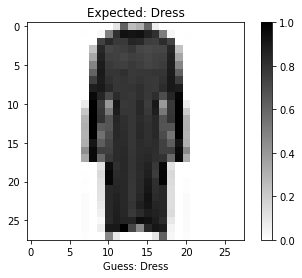

In [33]:
# Initialising the plot
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor']= COLOR


def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: "+ label)
  plt.xlabel("Guess: "+ guess)
  plt.colorbar()
  plt.show()


def get_number():
  while True:
    num = input("Pick a Number: ")
    if num.isdigit():
      num = int(num)
      if 0<=num<=1000:
        return int(num)
      else:
        print("Enter a valid Number between 0-100")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)
